In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
parcel_df = pd.read_csv('EXTR_Parcel.csv', encoding='latin-1')


In [3]:
# Only take KING COUNTY properties from parcel.csv
parcel_df = parcel_df[parcel_df['DistrictName']=='KING COUNTY']


In [4]:
parcel_df.head()


,Major,Minor,PropName,PlatName,PlatLot,PlatBlock,Range,Township,Section,QuarterSection,...,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems
0,172613,9003,,NaN,,,13,26,17,,...,N,N,N,N,N,N,N,N,N,N
2,52613,9002,,NaN,,,13,26,5,,...,N,N,N,N,N,N,N,N,N,N
6,32507,9017,,NaN,,,7,25,3,,...,N,N,N,N,N,N,N,N,N,N
7,342612,9019,,NaN,,,12,26,34,,...,N,N,N,N,N,N,N,N,N,N
9,192408,9020,,NaN,,,8,24,19,,...,N,N,N,N,N,N,N,N,N,N


In [17]:
parcel_df = parcel_df[['Major', 'Minor', "WfntLocation"]]

In [18]:
parcel_df.tail()

,Major,Minor,WfntLocation
612419,217200,540,0
612434,793350,245,9
612448,131044,860,0
612451,142306,9034,0
612469,247292,430,0


In [7]:
residentail_blg_df = pd.read_csv('EXTR_ResBldg.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
residentail_blg_df.columns
residentail_blg_df = residentail_blg_df[['Major', 'Minor', 'Address', 'SqFtTotLiving', 'Bedrooms']]

In [9]:
residentail_blg_df.head()


,Major,Minor,Address,SqFtTotLiving,Bedrooms
0,12303,9551,10638 31ST AVE SW 98146,960,3
1,12303,9576,10621 32ND AVE SW 98146,1900,4
2,12303,9585,10817 31ST AVE SW 98146,1920,3
3,12303,9598,10215 24TH AVE SW 98146,1030,2
4,12303,9601,3411 SW 106TH ST 98146,2380,4


In [10]:
sale_df = pd.read_csv('EXTR_RPSale.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
sale_df = sale_df[['DocumentDate', 'Major', 'Minor','SalePrice']]

In [13]:
sale_df.head()

,DocumentDate,Major,Minor,SalePrice
0,08/21/2014,138860,110,245000
1,07/09/1991,664885,40,0
2,10/11/2014,423943,50,0
3,01/04/2013,403700,715,0
4,04/20/1989,951120,900,85000


In [19]:
sale_parcel_df = pd.merge(sale_df, parcel_df, right_on=['Major', 'Minor'], left_on=['Major', 'Minor'])

In [20]:
all_df = pd.merge(sale_parcel_df, residentail_blg_df, right_on=['Major', 'Minor'], left_on=['Major', 'Minor'])

In [21]:
all_df.head()

,DocumentDate,Major,Minor,SalePrice,WfntLocation,Address,SqFtTotLiving,Bedrooms
0,04/02/2014,98400,380,0,0,12713 SE 188TH PL 98058,2050,4
1,03/23/1994,98400,380,139950,0,12713 SE 188TH PL 98058,2050,4
2,03/29/2017,98400,380,439500,0,12713 SE 188TH PL 98058,2050,4
3,04/01/2014,98400,380,0,0,12713 SE 188TH PL 98058,2050,4
4,03/28/2008,795508,170,0,0,19618 138TH AVE SE 98058,980,2


In [22]:
all_df.head()

,DocumentDate,Major,Minor,SalePrice,WfntLocation,Address,SqFtTotLiving,Bedrooms
0,04/02/2014,98400,380,0,0,12713 SE 188TH PL 98058,2050,4
1,03/23/1994,98400,380,139950,0,12713 SE 188TH PL 98058,2050,4
2,03/29/2017,98400,380,439500,0,12713 SE 188TH PL 98058,2050,4
3,04/01/2014,98400,380,0,0,12713 SE 188TH PL 98058,2050,4
4,03/28/2008,795508,170,0,0,19618 138TH AVE SE 98058,980,2


In [131]:
all_df['Major'] = pd.to_numeric(all_df['Major'], errors='coerce')
all_df['Minor'] = pd.to_numeric(all_df['Minor'], errors='coerce')


In [132]:
all_df = all_df.dropna()


In [23]:
all_df.isna().sum()



DocumentDate     0
Major            0
Minor            0
SalePrice        0
WfntLocation     0
Address          0
SqFtTotLiving    0
Bedrooms         0
dtype: int64

In [24]:
all_df.head()


,DocumentDate,Major,Minor,SalePrice,WfntLocation,Address,SqFtTotLiving,Bedrooms
0,04/02/2014,98400,380,0,0,12713 SE 188TH PL 98058,2050,4
1,03/23/1994,98400,380,139950,0,12713 SE 188TH PL 98058,2050,4
2,03/29/2017,98400,380,439500,0,12713 SE 188TH PL 98058,2050,4
3,04/01/2014,98400,380,0,0,12713 SE 188TH PL 98058,2050,4
4,03/28/2008,795508,170,0,0,19618 138TH AVE SE 98058,980,2


In [25]:
#Df virgin
housing_df = all_df

In [26]:
housing_df.head()



,DocumentDate,Major,Minor,SalePrice,WfntLocation,Address,SqFtTotLiving,Bedrooms
0,04/02/2014,98400,380,0,0,12713 SE 188TH PL 98058,2050,4
1,03/23/1994,98400,380,139950,0,12713 SE 188TH PL 98058,2050,4
2,03/29/2017,98400,380,439500,0,12713 SE 188TH PL 98058,2050,4
3,04/01/2014,98400,380,0,0,12713 SE 188TH PL 98058,2050,4
4,03/28/2008,795508,170,0,0,19618 138TH AVE SE 98058,980,2


In [27]:
housing_df['WfntLocation'] = housing_df['WfntLocation'].astype(bool)

In [28]:
housing_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 207131 entries, 0 to 207130
Data columns (total 8 columns):
DocumentDate     207131 non-null object
Major            207131 non-null object
Minor            207131 non-null object
SalePrice        207131 non-null int64
WfntLocation     207131 non-null bool
Address          207131 non-null object
SqFtTotLiving    207131 non-null int64
Bedrooms         207131 non-null int64
dtypes: bool(1), int64(3), object(4)
memory usage: 12.8+ MB


In [30]:
bottom_5 = np.percentile(housing_df['SalePrice'], 5)
top_5 = np.percentile(housing_df['SalePrice'], 95)

housing_df = housing_df[(housing_df['SalePrice'] > bottom_5) & (housing_df['SalePrice'] < top_5)]

In [31]:
housing_df.head(30)

,DocumentDate,Major,Minor,SalePrice,WfntLocation,Address,SqFtTotLiving,Bedrooms
1,03/23/1994,98400,380,139950,False,12713 SE 188TH PL 98058,2050,4
2,03/29/2017,98400,380,439500,False,12713 SE 188TH PL 98058,2050,4
5,04/09/2001,795508,170,174000,False,19618 138TH AVE SE 98058,980,2
7,10/31/1996,795508,170,135000,False,19618 138TH AVE SE 98058,980,2
8,04/30/2004,795508,170,210000,False,19618 138TH AVE SE 98058,980,2
9,12/21/2012,795508,170,148000,False,19618 138TH AVE SE 98058,980,2
11,02/21/1997,252206,9011,300000,False,26804 262ND AVE SE 98051,2530,3
12,11/28/2000,252206,9011,390000,False,26804 262ND AVE SE 98051,2530,3
13,12/03/2007,512700,540,332950,False,13820 SE 142ND ST 98059,1810,3
14,04/23/2013,512700,540,303957,False,13820 SE 142ND ST 98059,1810,3


In [32]:
housing_df.describe()


,SalePrice,SqFtTotLiving,Bedrooms
count,125651.000000,125651.000000,125651.000000
mean,289593.115908,2209.992033,3.310296
std,183007.127577,984.147877,0.888190
min,1.000000,0.000000,0.000000
25%,148000.000000,1520.000000,3.000000
50%,254950.000000,2070.000000,3.000000
75%,397950.000000,2720.000000,4.000000
max,819954.000000,15660.000000,31.000000


In [37]:
housing_df.columns
not_loc_feats = housing_df[['SalePrice','SqFtTotLiving', 'Bedrooms']]

Text(0.5, 1.0, 'The distribution of the saleprice')

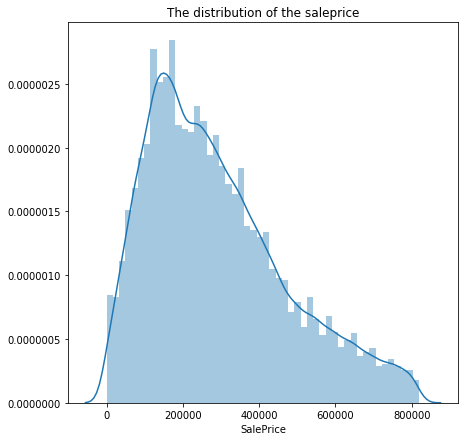

In [33]:
fig,ax = plt.subplots(figsize=(7,7))
ax = sns.distplot(housing_df.SalePrice)
ax.set_title('The distribution of the saleprice')

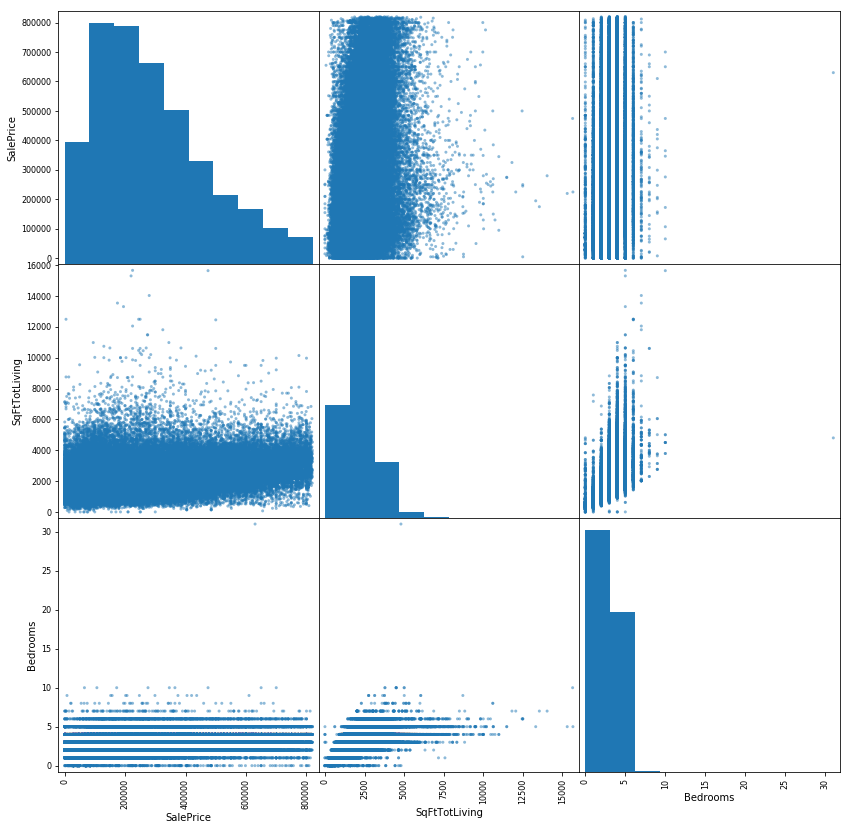

In [39]:
predictors = not_loc_feats
pd.plotting.scatter_matrix(predictors, figsize=(14, 14));
plt.show()

In [162]:
plt.show()


In [40]:
housing_df['WfntLocation'] = housing_df['WfntLocation'].astype(int)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


KeyboardInterrupt: 

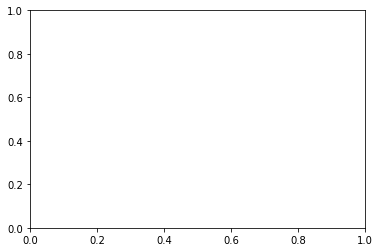

In [42]:
plt.hist(housing_df[['SalePrice','SqFtTotLiving', 'WfntLocation','Bedrooms']])

In [43]:
lr = LinearRegression()

In [44]:
y = housing_df['SalePrice']
X = housing_df[['SqFtTotLiving', 'WfntLocation','Bedrooms']]

In [45]:
housing_df

,DocumentDate,Major,Minor,SalePrice,WfntLocation,Address,SqFtTotLiving,Bedrooms
1,03/23/1994,98400,380,139950,0,12713 SE 188TH PL 98058,2050,4
2,03/29/2017,98400,380,439500,0,12713 SE 188TH PL 98058,2050,4
5,04/09/2001,795508,170,174000,0,19618 138TH AVE SE 98058,980,2
7,10/31/1996,795508,170,135000,0,19618 138TH AVE SE 98058,980,2
8,04/30/2004,795508,170,210000,0,19618 138TH AVE SE 98058,980,2
9,12/21/2012,795508,170,148000,0,19618 138TH AVE SE 98058,980,2
11,02/21/1997,252206,9011,300000,0,26804 262ND AVE SE 98051,2530,3
12,11/28/2000,252206,9011,390000,0,26804 262ND AVE SE 98051,2530,3
13,12/03/2007,512700,540,332950,0,13820 SE 142ND ST 98059,1810,3
14,04/23/2013,512700,540,303957,0,13820 SE 142ND ST 98059,1810,3


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [47]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [48]:
lr.score(X_test, y_test)

0.11471891034292347

In [49]:
lr.coef_

array([   60.21656332, 15226.85766668,   -51.21683315])

In [50]:
lr.intercept_

156038.724417358